In [60]:
import IPython.display
from ppget.source import DataSource

A_DAY = 60 * 24
DAYS_OF_DATA = 730
source = DataSource("./data/household_power_consumption.txt", size=DAYS_OF_DATA * A_DAY)
source.__next__()
source.frame.head()

2006-12-16 17:20:00 -> 2008-12-15 17:20:00


,Global_active_power
timestamp,
2006-12-16 17:20:00,4.587333
2006-12-16 17:30:00,4.252200
2006-12-16 17:40:00,4.721600
2006-12-16 17:50:00,3.476200
2006-12-16 18:00:00,4.690400


In [61]:
series = source.frame
series.head()

,Global_active_power
timestamp,
2006-12-16 17:20:00,4.587333
2006-12-16 17:30:00,4.252200
2006-12-16 17:40:00,4.721600
2006-12-16 17:50:00,3.476200
2006-12-16 18:00:00,4.690400


In [62]:
import pandas as pd
from sklearn.cluster import KMeans

clusters = range(1, 12)

def diminishing_returns(range, X):
    inertia = []
    for k in range:
        m = KMeans(n_clusters=k).fit(X)
        m.fit(X)
        inertia.append(m.inertia_)

    return inertia

kw_hour = pd.DataFrame(zip(list(series.values),list(series.index.hour)))
kw_hour.columns = ["kw", "hour"]
kw_hour.describe()

,hour
count,105121.000000
mean,11.500052
std,6.922207
min,0.000000
25%,6.000000
50%,12.000000
75%,17.000000
max,23.000000


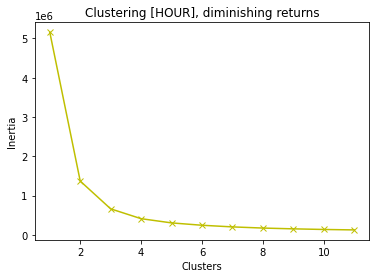

In [63]:
import matplotlib.pyplot as plt

daily_inertia = diminishing_returns(clusters, kw_hour)

plt.plot(clusters, daily_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [HOUR], diminishing returns')
plt.show()

In [64]:
h_kmeans = KMeans(n_clusters=4).fit(kw_hour)
centroids = h_kmeans.cluster_centers_
print(centroids)

[[ 1.2521034   8.5       ]
 [ 1.6004536  20.4996005 ]
 [ 0.50710826  2.5       ]
 [ 1.06518523 14.49980973]]


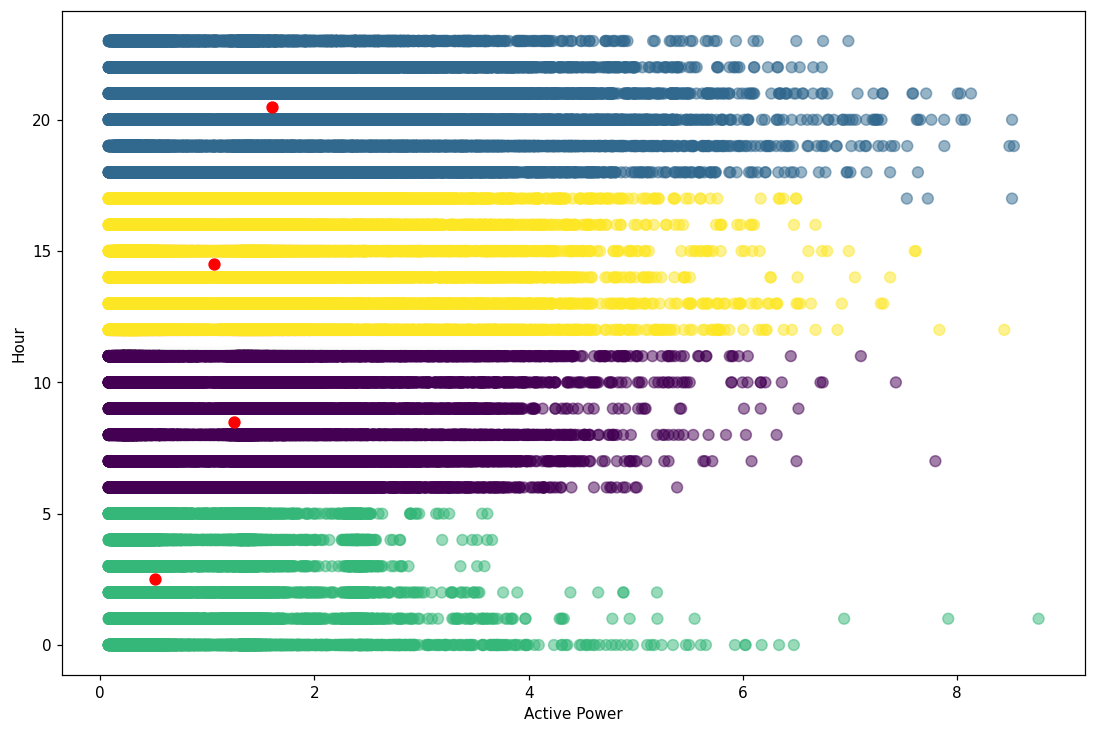

In [65]:
plt.figure(figsize=(12, 8), dpi=110)
plt.scatter(kw_hour["kw"], kw_hour["hour"], c=h_kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel("Hour")
plt.xlabel("Active Power")
plt.savefig(f"img/daily_seasonality.png")
plt.show()

## Clustering by Day of the Week:

In [66]:
kw_day_of_week = pd.DataFrame(zip(list(series.values),list(series.index.dayofweek)))
kw_day_of_week.columns = ["kw", "day_of_week"]
kw_day_of_week.describe()

,day_of_week
count,105121.000000
mean,3.001874
std,2.002967
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


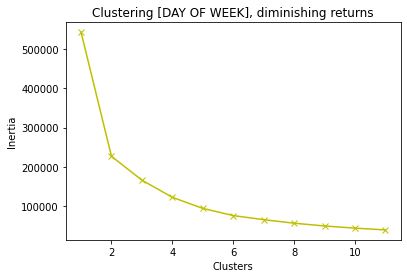

In [67]:
weekly_inertia = diminishing_returns(clusters, kw_day_of_week)

plt.plot(clusters, weekly_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [DAY OF WEEK], diminishing returns')
plt.show()

In [68]:
dow_kmeans = KMeans(n_clusters=4).fit(kw_day_of_week)
centroids = dow_kmeans.cluster_centers_
print(centroids)

[[0.73933663 4.98937718]
 [0.85859573 2.48820127]
 [3.24629448 4.61911973]
 [1.03058315 0.49662704]]


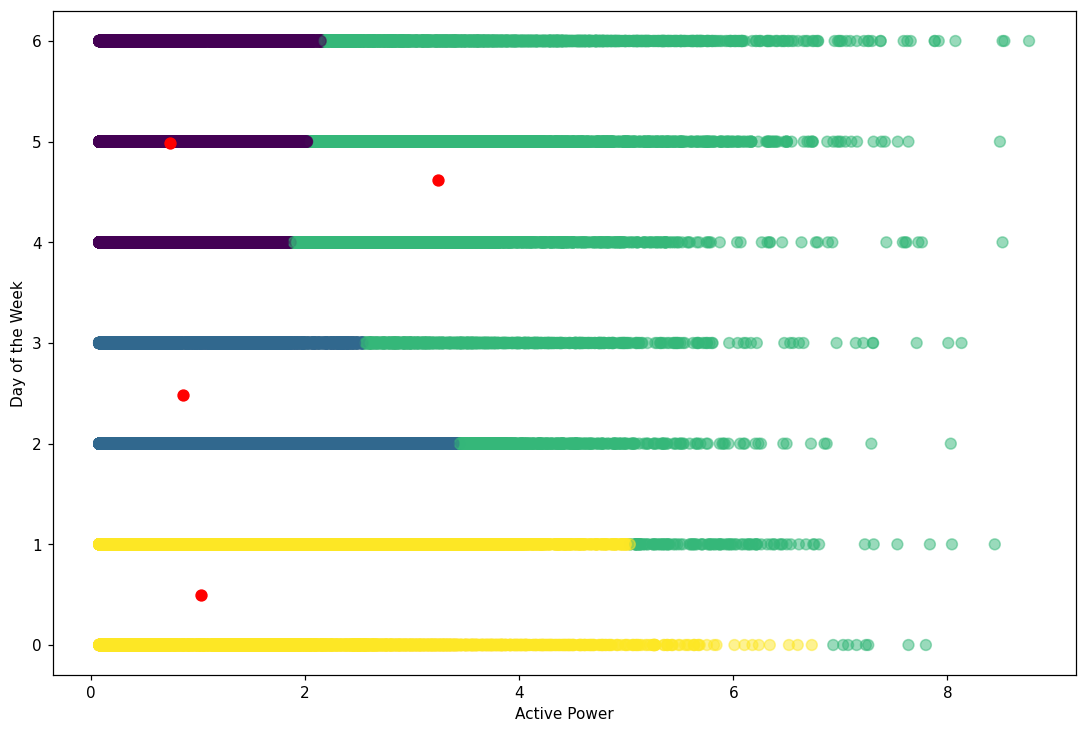

In [69]:
plt.figure(figsize=(12, 8), dpi=110)
plt.scatter(kw_day_of_week["kw"], kw_day_of_week["day_of_week"], c=dow_kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel("Day of the Week")
plt.xlabel("Active Power")
plt.savefig(f"img/weekly_seasonality.png")
plt.show()

## Clustering by Month:

In [70]:
kw_month = pd.DataFrame(zip(list(series.values),list(series.index.month)))
kw_month.columns = ["kw", "month"]
kw_month.describe()

,month
count,105121.000000
mean,6.512381
std,3.445982
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


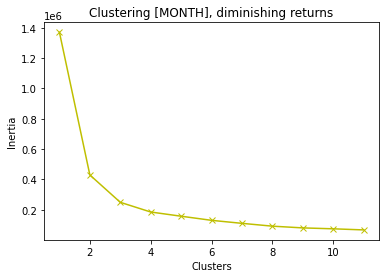

In [71]:
monthly_inertia = diminishing_returns(clusters, kw_month)

plt.plot(clusters, monthly_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [MONTH], diminishing returns')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=4).fit(kw_month)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.36853129  2.0039058 ]
 [ 0.69613821  7.97453961]
 [ 0.95916765  5.00194976]
 [ 1.39458157 10.9664422 ]]


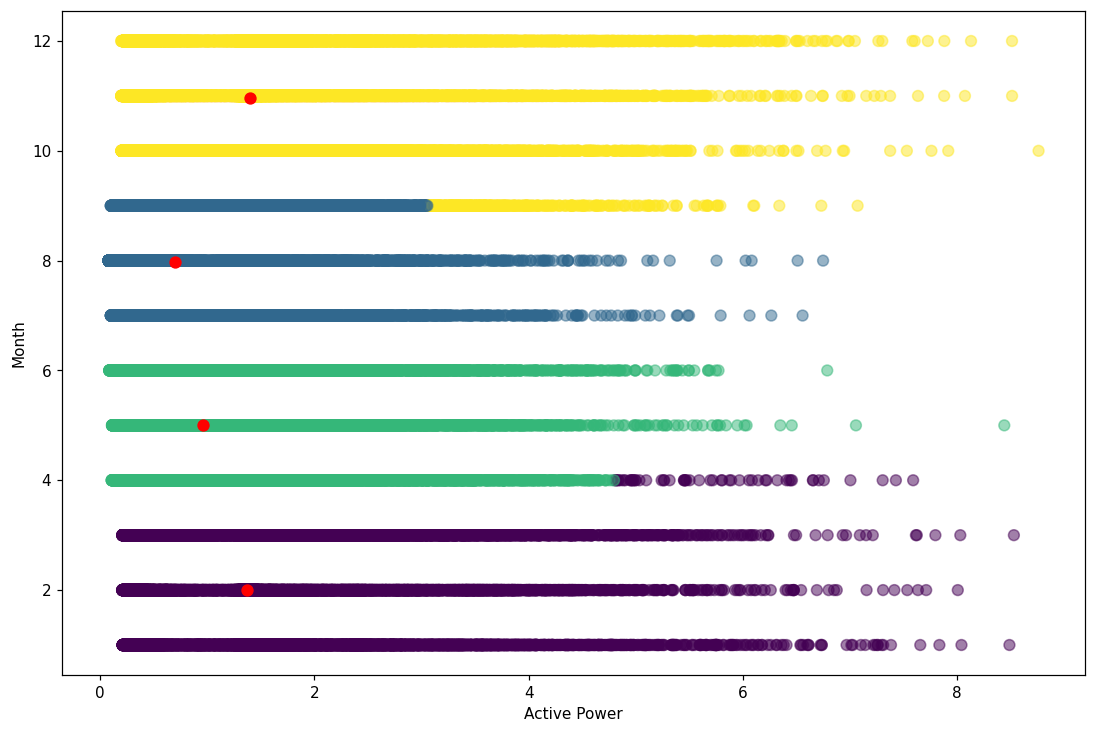

In [73]:
plt.figure(figsize=(12, 8), dpi=110)
plt.scatter(kw_month["kw"], kw_month["month"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel("Month")
plt.xlabel("Active Power")
plt.savefig(f"img/monthly_seasonality.png")
plt.show()